Noms des variables: ['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean']
Type de Age: int64
Type de Smoke: object
Niveaux de Smoke: ['no' 'yes']
                            OLS Regression Results                            
Dep. Variable:                LungCap   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1938.
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          5.44e-291
Time:                        16:51:50   Log-Likelihood:                -1066.9
No. Observations:                 725   AIC:                             2140.
Df Residuals:                     722   BIC:                             2154.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

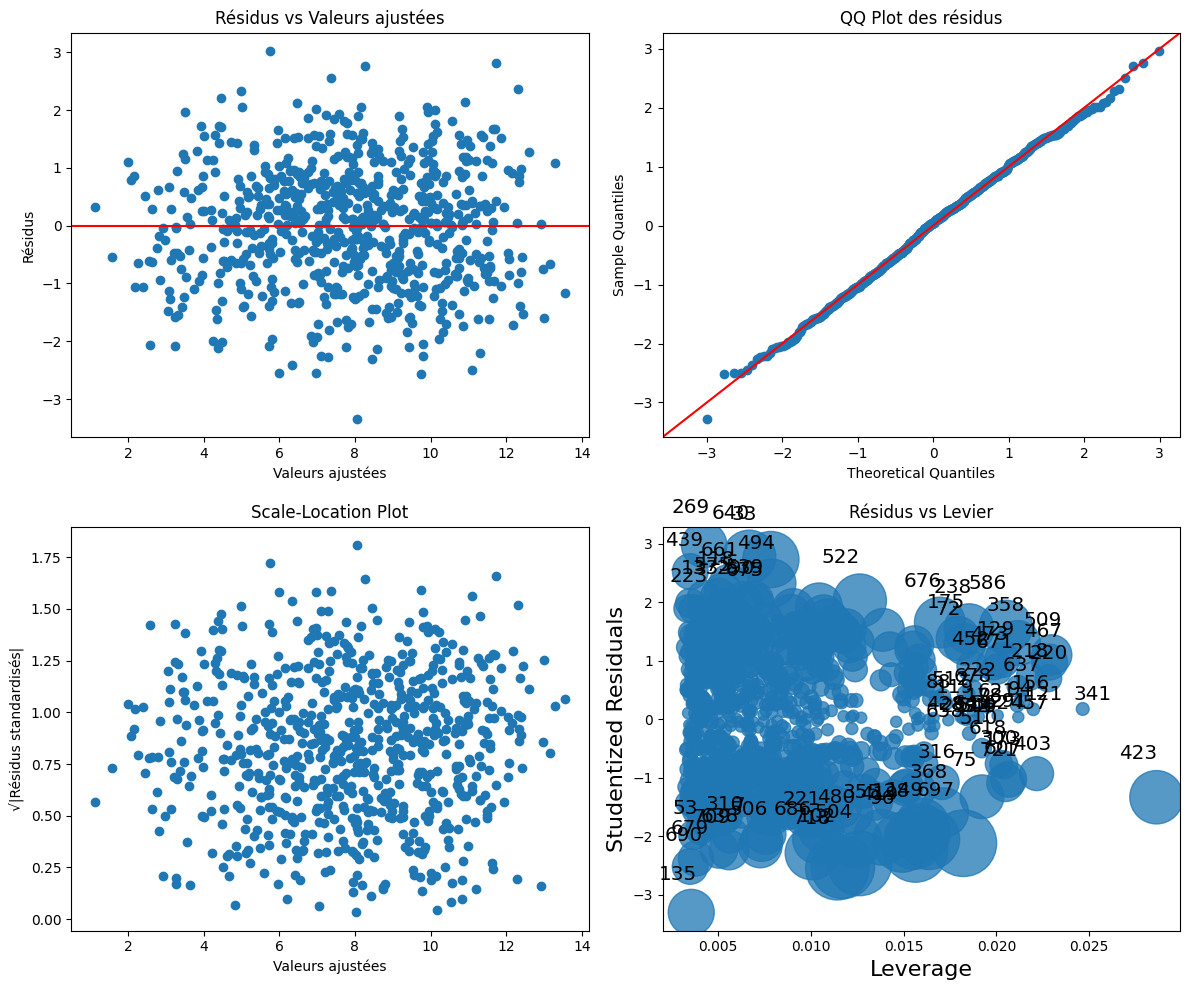

In [2]:
# Partie 2 - Exercice 2
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger les données et vérifier leur structure
# Note: en Python, nous utilisons pandas pour lire les fichiers tabulaires
LungCapData = pd.read_csv("LungCapData.txt", sep="\t")

# Afficher les noms des variables
print("Noms des variables:", LungCapData.columns.tolist())

# Vérifier le type des variables
print("Type de Age:", LungCapData['Age'].dtype)
print("Type de Smoke:", LungCapData['Smoke'].dtype)

# Si Smoke est un objet (équivalent à factor en R), afficher les niveaux
if pd.api.types.is_object_dtype(LungCapData['Smoke']):
    print("Niveaux de Smoke:", LungCapData['Smoke'].unique())

# Modèle de régression linéaire avec Age et Height
model1 = smf.ols('LungCap ~ Age + Height', data=LungCapData).fit()

# Afficher les coefficients du modèle
print(model1.summary())

# Calculer la corrélation de Pearson entre Age et Height
correlation, p_value = pearsonr(LungCapData['Age'], LungCapData['Height'])
print(f"Corrélation de Pearson entre Age et Height: {correlation:.4f}, p-value: {p_value:.4f}")

# Intervalle de confiance à 95% pour chaque coefficient
print("Intervalles de confiance à 95%:")
print(model1.conf_int(alpha=0.05))

# Modèle de régression avec toutes les variables
# Note: pour les variables catégorielles, Python va créer automatiquement des variables indicatrices
model2 = smf.ols('LungCap ~ Age + Height + Smoke + Gender + Caesarean', data=LungCapData).fit()

# Résumé du second modèle
print(model2.summary())

# Tracer les graphiques du modèle
fig = plt.figure(figsize=(12, 10))

# Résidus vs valeurs ajustées
ax1 = fig.add_subplot(221)
ax1.scatter(model2.fittedvalues, model2.resid)
ax1.axhline(y=0, color='r', linestyle='-')
ax1.set_xlabel('Valeurs ajustées')
ax1.set_ylabel('Résidus')
ax1.set_title('Résidus vs Valeurs ajustées')

# QQ Plot des résidus standardisés
ax2 = fig.add_subplot(222)
sm.qqplot(model2.resid_pearson, line='45', ax=ax2)
ax2.set_title('QQ Plot des résidus')

# Scale-Location Plot
ax3 = fig.add_subplot(223)
ax3.scatter(model2.fittedvalues, np.sqrt(np.abs(model2.resid_pearson)))
ax3.set_xlabel('Valeurs ajustées')
ax3.set_ylabel('√|Résidus standardisés|')
ax3.set_title('Scale-Location Plot')

# Résidus vs Levier
ax4 = fig.add_subplot(224)
sm.graphics.influence_plot(model2, ax=ax4, criterion="cooks")
ax4.set_title('Résidus vs Levier')

plt.tight_layout()
plt.show()


#L'intervalle de confiance à 95% signifie que si l'on refait plusieurs fois l'expérience,")
#"dans 95% des cas, la vraie valeur du coefficient sera contenue dans cet intervalle.")